# NLU Demo notebook

The DACCS NLU module transforms Natural Language Queries in climate and earth observation domain to structured queries. 

This notebook showcases the three (3) different baselines of the NLU DACCS module, and executes the structured queries against a STAC catalog.

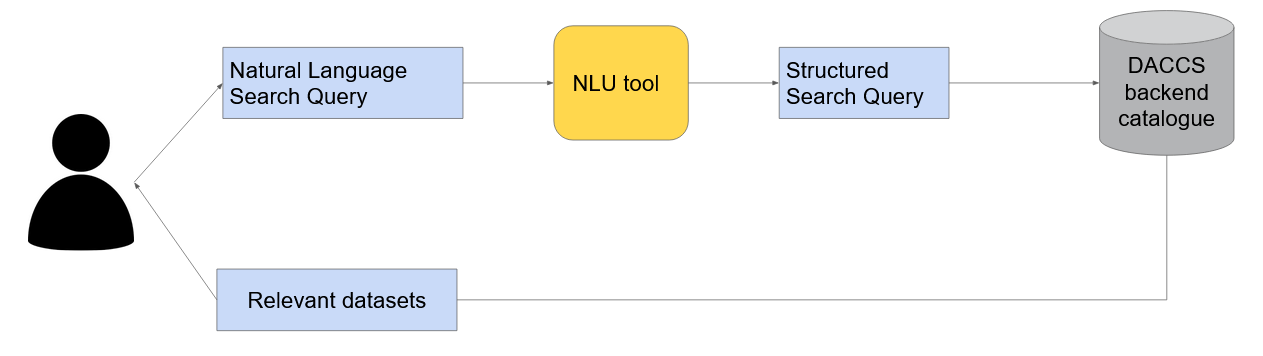

In [ ]:
# initialize the demo class
from nlu_demo import NLU_demo
nlu = NLU_demo()

## 1. Natural language query

### Pick a query from the evaluation dataset 

In [ ]:
# select a query from the dropdown list
nlu.select_gold_query()

In [ ]:
# optionnally: view the gold annotations
nlu.get_gold_annotations()

### OR define your own custom search query

In [ ]:
# write your query here
nlu.custom_query()

## 2. Select NLU version

- V1: basic NER (SpaCy, Flair), HeidelTime, Textsearch
- V2: Chroma vector DB with CF standard names and CMIP6 vocabularies, Duckling, OSMNX geocoding
- V3: a combination of V1 and V2

In [ ]:
nlu.select_nlu_version()

## 3. Transform NL query to structured representation

The structured query is the intermediary structured representation of the natural language query that the NLU module produces. 

One query can have many annotations.
An annotation can be any of the four (4) types: 
- property: generic metadata properties and their values,
- location: disambiguated location name with its bounding box polygon coordinates,
- tempex: temporal expressions as datetime format. single valued or a range,
- target : list of climate variable standard names

In [ ]:
# run the NLU pipeline on the natural language query
nlu.nl2query()

## 4. Optionally - run against a STAC catalog (experimental)

Transform the structured query into a STAC query and execute it using Pystac-client Python library.

Possible search criterias: https://pystac-client.readthedocs.io/en/latest/usage.html#itemsearch

We use the following parameters:

- collections, bbox, datetime, query (property/operator/value), max_items

### Select a catalog and execute the query

In [ ]:
nlu.select_stac_catalog()

In [ ]:
nlu.run_stac_query()

### Run your own STAC query parameters

In [ ]:
params = {
    'collections': [],
    'bbox': [-85.0, 45.0, -59.0, 80.0],
    'datetime': ['2021-02-02T00:00:00Z','2900-01-01T00:00:00Z'],
    'query' : ['institude_id:CCCS', 'project_id:CMIP6', 'frequency:day']
    }
nlu.run_custom_stac_query(params) 

In [ ]:
# Select EARTH_AWS as catalog
# Example - Sentinel-2 on EARTH_AWS
params = {
    'collections': ['sentinel-2-l2a'],
    'bbox': [160.6, -55.95, -170, -25.89],
    'datetime': ['2020-04-01T00:00:00Z', '2022-09-30T00:00:00Z'],
    'query' : ['eo:cloud_cover>10']
    }
nlu.run_custom_stac_query(params)